# Notebook d'exploration Warren

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import yfinance as yf
import QuantLib as ql

Acheter des options quand le VIX est bas, les vendre quand il est haut. Le prix d'une option dépend beaucoup de la volatilité du marché, donc du sous-jacent dont elle dépend. L'idée ici est de voir si il y a une corrélation avec les prix des options et l'évolution du VIX.

In [2]:
vix_data = yf.download('^VIX', start='2014-01-01', end='2024-01-01')
vix_data.reset_index(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
vix_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
0,2014-01-02,14.23,14.59,14.00,14.32,0
1,2014-01-03,13.76,14.22,13.57,14.06,0
2,2014-01-06,13.55,14.00,13.22,13.41,0
3,2014-01-07,12.92,13.28,12.16,12.38,0
4,2014-01-08,12.87,13.24,12.86,13.04,0


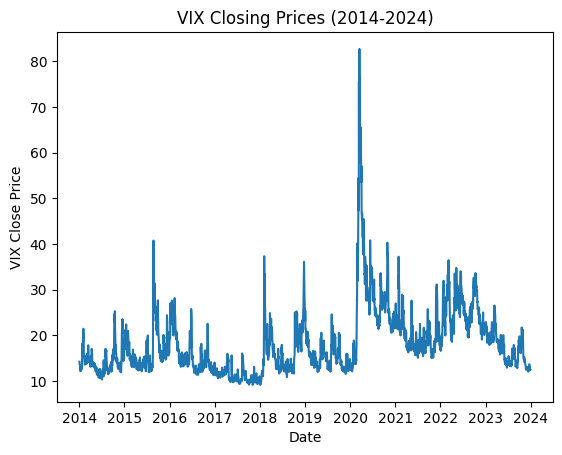

In [7]:
plt.plot(vix_data['Date'], vix_data['Close'])
plt.title('VIX Closing Prices (2014-2024)')
plt.xlabel('Date')
plt.ylabel('VIX Close Price')
plt.show()

In [10]:
# options data on SPX
spx_options = yf.Ticker('^SPX').options
options_chain = yf.Ticker('^SPX').option_chain(spx_options[0])
calls = options_chain.calls
puts = options_chain.puts
calls.head()
puts.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW251205P02400000,2025-11-21 15:37:11+00:00,2400.0,0.10,0.0,0.05,0.0,0.0,20.0,44,5.375003,False,REGULAR,USD
1,SPXW251205P02600000,2025-11-19 20:30:41+00:00,2600.0,0.05,0.0,0.05,0.0,0.0,NaN,2,4.968754,False,REGULAR,USD
2,SPXW251205P02800000,2025-11-18 21:02:35+00:00,2800.0,0.10,0.0,0.05,0.0,0.0,24.0,279,4.609379,False,REGULAR,USD
3,SPXW251205P03000000,2025-11-18 19:26:58+00:00,3000.0,0.10,0.0,0.05,0.0,0.0,34.0,79,4.265630,False,REGULAR,USD
4,SPXW251205P03200000,2025-11-21 14:36:06+00:00,3200.0,0.22,0.0,0.05,0.0,0.0,2.0,20,3.937500,False,REGULAR,USD


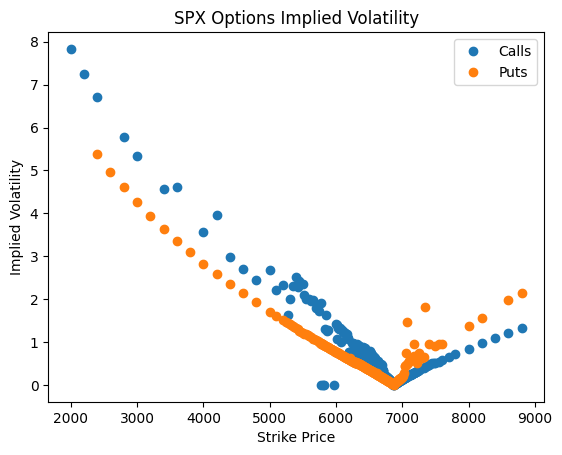

In [16]:
plt.plot(calls['strike'], calls['impliedVolatility'], 'o', label='Calls')
plt.plot(puts['strike'], puts['impliedVolatility'], 'o', label='Puts')
plt.title('SPX Options Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()